# Uvod u Pandas

Napomena: Ovi materijali su delimično bazirani na pandas tutorijalu Keith Galli-a ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks). Takođe, dataset koji ćemo koristiti - [Sales dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data) - je preuzet iz pomenutog tutorijala.

## Učitavanje potrebnih biblioteka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

## Učitavanje podataka i upoznavanje sa podacima o prodaji za jedan mesec 

### Učitavanja podataka iz csv fajla

Podaci se nalaze u 'sales_data' direktorijumu, u okviru 'data' direktorijuma. 
Prvo ćemo kreirati DATA_DIR konstantu koja će sadržati putanju do direktorijuma sa podacima   

In [2]:
DATA_DIR = Path.cwd() / 'data' / 'sales_data'

Zatim ćemo učitati podatke iz 'Sales_January_2019' csv fajla: 

In [3]:
jan_sales = pd.read_csv(DATA_DIR / 'Sales_January_2019.csv')

### Upoznavanje sa podacima 

Prikazati prvih 10 redova učitanog dataset-a

In [4]:
jan_sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


Utvrditi dimenzije data frame-a (broj redova i kolona)

In [5]:
jan_sales.shape

(9723, 6)

Ispisati listu naziva kolona data frame-a

In [6]:
jan_sales.columns.values

array(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address'], dtype=object)

Utvrditi tip podatka svake kolone 

In [7]:
jan_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Lep pregled tipova podataka u pandas-u, uključujući i njihovo mapiranje na python tipove podataka, može se naći, na primer, ovde: [https://pbpython.com/pandas_dtypes.html](https://pbpython.com/pandas_dtypes.html).

Kompletan skup informacija o data frame-u:

In [8]:
jan_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


### Provera nedostajućih vrednosti

Prisustvo nedostajućih vrednosti u data frame-u može se ispitati primenom `isna()` metode:

In [9]:
jan_sales.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

#### Uklanjanje redova sa svim nedostajućim vrednostima

In [10]:
jan_sales.dropna(how='all', inplace=True)

In [11]:
jan_sales.isna().sum().sum()

0

### Selekcija pojedinačnih kolona i redova i kreiranje podskupa podataka

Selekcija kolona i redova, odnosno kreiranje podskupa podataka, se može uraditi na različite načine, ali je preporučena praksa da se koriste `loc` ili `iloc` metode pandas Dataframe-a i to na sledeći način:

- Kada se selekcija redova i kolona vrši izbor na osnovu njihovog rednog broja, trebalo bi koristiti `iloc`

- Kada se izbor zasniva na uslovu koje redovi treba da zadovolje i/ili kolone treba izabrati na osnovu njihovih naziva, treba koristiti `loc` 

**Primer 1**: selektovati prve 3 kolone i prvih 6 redova

In [12]:
jan_sales.iloc[:6, :3]

,Order ID,Product,Quantity Ordered
0,141234,iPhone,1
1,141235,Lightning Charging Cable,1
2,141236,Wired Headphones,2
3,141237,27in FHD Monitor,1
4,141238,Wired Headphones,1
5,141239,AAA Batteries (4-pack),1


**Primer 2**: selektovati poslednjih 5 redova i 1., 2., i 5. kolonu

In [13]:
jan_sales.iloc[-5:, [0,1,4]]

,Order ID,Product,Order Date
9718,150497,20in Monitor,01/26/19 19:09
9719,150498,27in FHD Monitor,01/10/19 22:58
9720,150499,ThinkPad Laptop,01/21/19 14:31
9721,150500,AAA Batteries (4-pack),01/15/19 14:21
9722,150501,Google Phone,01/13/19 16:43


**Primer 3**: Selektovati kolone `Order ID`, `Order Date`, i `Purchase Address` za porudžbine iz Bostona

Tip: string vrednostima kolone možemo pristupiti preko `str` polja, tako da onda možemo pozvati bilo koju string metodu nad vrednostima kolone

In [14]:
jan_sales.loc[jan_sales['Purchase Address'].str.contains('Boston'), ['Order ID', 'Order Date', 'Purchase Address']]

,Order ID,Order Date,Purchase Address
0,141234,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
17,141251,01/24/19 08:13,"414 Walnut St, Boston, MA 02215"
29,141263,01/11/19 23:33,"640 Spruce St, Boston, MA 02215"
31,141265,01/01/19 16:52,"853 Ridge St, Boston, MA 02215"
37,141271,01/30/19 10:51,"90 13th St, Boston, MA 02215"
...,...,...,...
9627,150409,01/10/19 02:38,"410 Forest St, Boston, MA 02215"
9660,150440,01/10/19 19:19,"82 Johnson St, Boston, MA 02215"
9666,150445,01/11/19 13:56,"147 Lincoln St, Boston, MA 02215"
9694,150473,01/10/19 09:09,"148 Hickory St, Boston, MA 02215"


**Primer 4**: Selektovati kolone `Order ID`, `Product`, i `Price Each` za porudžbine kod kojih naručena količina nije manja od 3

Napomena: Primetite da iako bi kolona `Quantity Ordered` trebalo da sadrži numeričke podatke, njene vrednosti su zapisane kao stringovi: 

In [15]:
type(jan_sales['Quantity Ordered'][0])

str

Tako da je potrebno da prvo transformišemo `Quantity Ordered` kolonu u numerički tip:

In [16]:
jan_sales['Quantity Ordered'] = pd.to_numeric(jan_sales['Quantity Ordered'], errors='coerce')

Sada se možemo vratiti selekciji redova i kolona:

In [17]:
jan_sales.loc[jan_sales['Quantity Ordered'] >= 3, ['Order ID', 'Product', 'Price Each']]

,Order ID,Product,Price Each
12,141246,AAA Batteries (4-pack),2.99
52,141285,AAA Batteries (4-pack),2.99
58,141290,AA Batteries (4-pack),3.84
73,141305,AAA Batteries (4-pack),2.99
84,141316,AAA Batteries (4-pack),2.99
...,...,...,...
9513,150299,AA Batteries (4-pack),3.84
9590,150372,AAA Batteries (4-pack),2.99
9636,150417,Wired Headphones,11.99
9659,150439,Wired Headphones,11.99


## Učitavanje podataka o prodaji za sve mesece u 2019. god. i integracija mesečnih podataka o prodaji u jedan data frame

Potrebno je da učitamo podatke o prodaji iz svih csv fajlova u 'sales_data' direktorijumu (po jedan fajl za svaki mesec 2019. god.)

Prvo ćemo videti kako možemo da selektujemo samo .csv fajlove iz datog direktorijuma:

In [18]:
def get_csv_files(fpath):
    if not fpath.is_dir():
        print("Greska! Zadata putanja nije putanja do direktorijuma")
        return None
    
    csv_files = []
    for f in fpath.iterdir():
        if f.is_dir(): continue
        if f.suffix == '.csv':
            csv_files.append(f)
    return csv_files

In [19]:
sales_files = get_csv_files(DATA_DIR)
if sales_files:
    for sale_file in sales_files:
        print(sale_file.name)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


Sada ćemo, u petlji, uzimati jedan po jedan csv fajl, učitati podatke iz njega i dodati učitane podatke u jedan data frame koji sadrži podatke o prodaji za celu godinu. Za spajanje dva data frame-a, koristimo funkciju `pd.concat`:

In [20]:
all_sales = pd.DataFrame()

for f in get_csv_files(DATA_DIR):
    monthly_sales = pd.read_csv(f)
    all_sales = pd.concat([all_sales, monthly_sales])

In [21]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Pregled učitanih i integrisanih podataka o prodaji

In [22]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Obratite pažnju na razliku između broja redova i vrednosti indeksa. Deluje kao da se učitane vrednosti indeksa ponavljaju. Da posle ne bismo imali problema, potrebno je da sredimo, odnosno resetujemo indeks:

In [23]:
all_sales.reset_index(drop=True, inplace=True)  

In [24]:
all_sales.index

RangeIndex(start=0, stop=186850, step=1)

Preimenovaćemo data frame, da smanjimo kucanje: 

In [25]:
sales = all_sales

Primetite da smo samo dali novo ime (referencu) postojećem objektu, odnosno, nismo kreirali novi data frame objekat, već samo novu referencu na postojeći

To možemo da potvrdimo:

In [26]:
sales is all_sales

True

In [27]:
id(sales) == id(all_sales)

True

Ako bismo hteli da kreiramo novi pd.DataFrame objekat, identičan postojećem, bilo bi potrebno da uradimo sledeće:

In [28]:
all_sales_copy = all_sales.copy() 

In [29]:
all_sales_copy is all_sales

False

In [30]:
del all_sales_copy

In [31]:
del all_sales

In [32]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Sređivanje podataka (data wrangling) 

In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Veliki broj kolona je tipa object, uključujući i one za koje to ne bismo očekivali - konkretno, kolone `Quantity Ordered`, `Price Each` i `Order Date`. To moramo promeniti, ali prvo ćemo se pozabaviti nedostajućim vrednostima.

### Uklanjanje observacija sa nedostajućim vrednostima

Izlaz f. `info()` sugeriše da nedostaju kompletni redovi podataka, odnosno da imamo observacije sa svim nedostajućim vrednostima. Uzećemo uzorak da to proverimo:

In [34]:
sales.loc[sales.Product.isna(), ].sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
126423,NaN,NaN,NaN,NaN,NaN,NaN
3865,NaN,NaN,NaN,NaN,NaN,NaN
176024,NaN,NaN,NaN,NaN,NaN,NaN
45274,NaN,NaN,NaN,NaN,NaN,NaN
160873,NaN,NaN,NaN,NaN,NaN,NaN
156553,NaN,NaN,NaN,NaN,NaN,NaN
50407,NaN,NaN,NaN,NaN,NaN,NaN
185200,NaN,NaN,NaN,NaN,NaN,NaN
38227,NaN,NaN,NaN,NaN,NaN,NaN
19898,NaN,NaN,NaN,NaN,NaN,NaN


Uklonićemo observacije (redove) sa svim nedostajućim vrednostima

In [35]:
sales.dropna(how='all', inplace=True)

In [36]:
sales.isna().sum().sum()

0

### Transformacija varijabli *Quantity Ordered* i *Price Each* u numeričke, a *Order Date* u datetime

Korisne smernice za ove oblike transformacije varijabli mogu se naći u odgovorima na [ovo pitanje na StackOverflow-u](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

Prvo ćemo pokušati da transformišemo `Quantity Ordered` u numeričku kolonu

In [37]:
try:
    sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='raise')
except ValueError as err:
    print(err)

Unable to parse string "Quantity Ordered" at position 254


Pogledaćemo red (observaciju) gde je došlo do greške:

In [38]:
sales.iloc[254,]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 254, dtype: object

Red koji je uslovio grešku očigleno sadrži pogrešno unete podatke koji nam nisu potrebni. Tako da ćemo izvršiti konverziju u numerički tip i, pri tome, vrednosti koje ne mogu da se transformišu u numeričke zameniti sa NaN (tj. označiti podatke kao nedostajuće)

In [39]:
sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')

Utvrdićemo broj i procenat uvedenih nedostajućih vrednosti u koloni `Quantity_Ordered`:

In [40]:
sales.Quantity_Ordered.isna().sum()

355

In [41]:
sales.Quantity_Ordered.isna().mean() * 100

0.19054775770913288

Na isti način ćemo transformisati `Price Each` kolonu:

In [42]:
sales['Price_Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

In [43]:
sales.Price_Each.isna().sum()

355

In [44]:
sales.Price_Each.isna().mean() * 100

0.19054775770913288

Izbacićemo redove gde su naručena količina ili jedinična cena nepoznati (NaN)

In [45]:
rows_to_drop = sales.loc[sales.Price_Each.isna() | sales.Quantity_Ordered.isna(),].index

In [46]:
sales.drop(rows_to_drop, axis=0, inplace=True)

Alternativa za prethodne dve linije koda:

In [47]:
# sales.dropna(how='any', subset=['Price_Each', 'Quantity_Ordered'], inplace=True)

Proverićemo veličinu data frame-a nakon uklanjanja redova sa svim nedostajućim vrednostima:

In [48]:
sales.shape

(185950, 8)

Konačno, transformisaćemo `Order Date` u datetime tip

In [49]:
try:
    sales['Order_Date'] = pd.to_datetime(sales['Order Date'], format="%m/%d/%y %H:%M")
except ValueError as err:
    print(err)

In [50]:
sales[['Order Date', 'Order_Date']].head(10)

,Order Date,Order_Date
0,12/30/19 00:01,2019-12-30 00:01:00
1,12/29/19 07:03,2019-12-29 07:03:00
2,12/12/19 18:21,2019-12-12 18:21:00
3,12/22/19 15:13,2019-12-22 15:13:00
4,12/18/19 12:38,2019-12-18 12:38:00
5,12/31/19 22:58,2019-12-31 22:58:00
6,12/16/19 15:10,2019-12-16 15:10:00
7,12/13/19 09:29,2019-12-13 09:29:00
8,12/15/19 23:26,2019-12-15 23:26:00
9,12/28/19 11:51,2019-12-28 11:51:00


Nakon ovih transformacija, proverićemo kako sad izgledaju tipovi podataka u data frame-u:

In [51]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date                  object
Purchase Address            object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
dtype: object

Uklonićemo kolone koje više nisu potrebne:

In [52]:
sales.drop(columns=['Order Date', 'Price Each', 'Quantity Ordered'], inplace=True)

In [53]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Purchase Address  185950 non-null  object        
 3   Quantity_Ordered  185950 non-null  float64       
 4   Price_Each        185950 non-null  float64       
 5   Order_Date        185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


### Dodavanje *Purchase_City* kolone

Sad ćemo videti kako možemo da napravimo novu kolonu od postojeće.

Pošto će nam kasnije biti potrebno da uporedimo prodaju po gradovima, dodaćemo kolonu sa nazivom grada u kome je porudžbina napravljena. Nakon imena grada treba da stoji oznaka države, data u zagradi (npr. „Atlanta (GA)“), da bi se omogućilo razlikovanje gradova sa istim nazivima.   

Uzećemo uzorak vrednosti kolone `Purchase Address` kako bismo se upoznali sa formatom u kome su adrese zapisane:

In [54]:
sales['Purchase Address'].sample(5)

140914      122 Washington St, Dallas, TX 75001
153107    798 Madison St, Los Angeles, CA 90001
98762           840 12th St, Portland, OR 97035
153428            828 Elm St, Seattle, WA 98101
88790           387 Maple St, Atlanta, GA 30301
Name: Purchase Address, dtype: object

Prvo ćemo kreirati funkciju koja izdvaja grad (i oznaku države) iz kolone `Purchase Address`: 

In [55]:
def get_city_and_state(address):
    street, city, state_zip = address.split(',')
    state, zip = state_zip.split()
    return f"{city.lstrip()} ({state.lstrip()})"

Zatim ćemo koristeći `apply` metodu, primeniti `get_city_and_state()` f. na svaku vrednost serije `Purchase Address`. Ali, prvo ćemo isprobati na uzorku adresa:

In [56]:
sales['Purchase Address'].sample(10).apply(get_city_and_state)

109254    San Francisco (CA)
148858      Los Angeles (CA)
138381    San Francisco (CA)
170988      Los Angeles (CA)
173568    New York City (NY)
109128           Austin (TX)
160832      Los Angeles (CA)
64867     New York City (NY)
79288     San Francisco (CA)
86821     San Francisco (CA)
Name: Purchase Address, dtype: object

Sad možemo primenti funkciju na sve vrednosti kolone `Purchase Address`, kako bi kreirali novu kolonu - `Purchase_City`

In [57]:
sales['Purchase_city'] = sales['Purchase Address'].apply(get_city_and_state)

In [58]:
sales[['Purchase Address', 'Purchase_city']].sample(10)

,Purchase Address,Purchase_city
180022,"586 Sunset St, New York City, NY 10001",New York City (NY)
19883,"590 Elm St, New York City, NY 10001",New York City (NY)
92928,"148 14th St, San Francisco, CA 94016",San Francisco (CA)
109657,"403 Lincoln St, San Francisco, CA 94016",San Francisco (CA)
20651,"68 7th St, San Francisco, CA 94016",San Francisco (CA)
174474,"217 Washington St, Seattle, WA 98101",Seattle (WA)
3847,"309 Park St, Los Angeles, CA 90001",Los Angeles (CA)
174878,"67 12th St, Boston, MA 02215",Boston (MA)
3265,"686 1st St, Seattle, WA 98101",Seattle (WA)
32868,"767 9th St, San Francisco, CA 94016",San Francisco (CA)


Sačuvaćemo transformisani dataset u csv fajl:

In [59]:
def get_processed_data_dir():
    processed_data_dir = Path.cwd() / 'data' / 'processed_data'
    if not processed_data_dir.exists():
        processed_data_dir.mkdir()
    return processed_data_dir

sales.to_csv(get_processed_data_dir() / 'all_sales_2019.csv', index=False)

Ili još bolje serijalizovati u .pkl fajl, kako bi se sačuvali svi tipovi podataka:    

In [60]:
sales.to_pickle(get_processed_data_dir() / 'all_sales_2019.pkl')

In [61]:
sales_recovered = pd.read_pickle(get_processed_data_dir() / 'all_sales_2019.pkl')
sales_recovered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Purchase Address  185950 non-null  object        
 3   Quantity_Ordered  185950 non-null  float64       
 4   Price_Each        185950 non-null  float64       
 5   Order_Date        185950 non-null  datetime64[ns]
 6   Purchase_city     185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 11.3+ MB


In [62]:
del sales_recovered

## Eksploratorna analiza podataka

Sada ćemo pokušati da odgovorimo na neka pitanja vezana za ostvarenu prodaju u 2019. godini, kroz eksploratornu analizu `sales` dataseta

### Zadatak 1. Koji je bio najbolji mesec za prodaju? Kolika zarada je ostvarena tog meseca?

Da bismo odgovorili na ovo pitanje, potrebno je da:
- izračunamo ukupan prihod po porudžbini
- izdvojimo mesec iz datuma porudžbine, tako da možemo grupisati porudžbine na mesečnoj osnovi
- izračunamo ukupan prihod na mesečnom nivou

**Korak 1**: Izračunavanje ukupnog prihoda po porudžbini

In [63]:
sales['Total_Price'] = sales.Quantity_Ordered * sales.Price_Each

**Korak 2**: Izdvajanje meseca iz datuma porudžbine (`Order_Date`)

S obzirom da je `Order_Date` pandas serija tipa datetime, možemo koristiti `dt` da bismo dobili pristup svakoj vrednosti u seriji kao datetime objektu. 

Kad imamo pristup datumu porudžbine kao datetime objektu, možemo uzeti bilo koji element datuma (godina, mesec, dan, itd.) i vremena porudžbine kroz odgovarajuća polja objekta.

In [64]:
sales['Order_Month'] = sales.Order_Date.dt.month

In [65]:
sales[['Order_Date', 'Order_Month']].sample(10)

,Order_Date,Order_Month
118291,2019-10-11 15:14:00,10
78798,2019-08-11 10:41:00,8
127996,2019-10-09 09:26:00,10
3769,2019-12-03 12:05:00,12
43192,2019-04-02 09:45:00,4
9123,2019-12-01 12:03:00,12
64787,2019-03-19 22:07:00,3
163721,2019-07-14 17:22:00,7
180754,2019-06-12 21:06:00,6
74474,2019-08-20 14:15:00,8


**Korak 3**: Izračunavanje ukupnog prihoda za svaki mesec

In [66]:
tot_sales_per_month = sales.groupby('Order_Month')['Total_Price'].sum()
tot_sales_per_month

Order_Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_Price, dtype: float64

Sortiranje rezultata u opdajućem redosledu ukupnog mesečnog prihoda

In [67]:
tot_sales_per_month.sort_values(ascending=False)

Order_Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total_Price, dtype: float64

Možemo predstaviti i sagledati mesečne prihode na (bar) plotu, pošto vizuelno predstavljanje podataka često olakšava razumevanje trendova koji mogu biti prisutni u podacima.

Za kreiranje plota, koristićemo Matplotlib bibliotetku, čiju dokumentaciju možete naći [ovde](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), dok [ovaj primer](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py) može poslužiti kao dobra polazna osnova za konkretni zadatak vizuelizacije koji imamo.

Napomena: Na [ovom GitHub repozitorijumu](https://github.com/matplotlib/cheatsheets) možete naći dobro urađene cheat sheets i savete za korišćenje Mathplotlib bliblioteke.

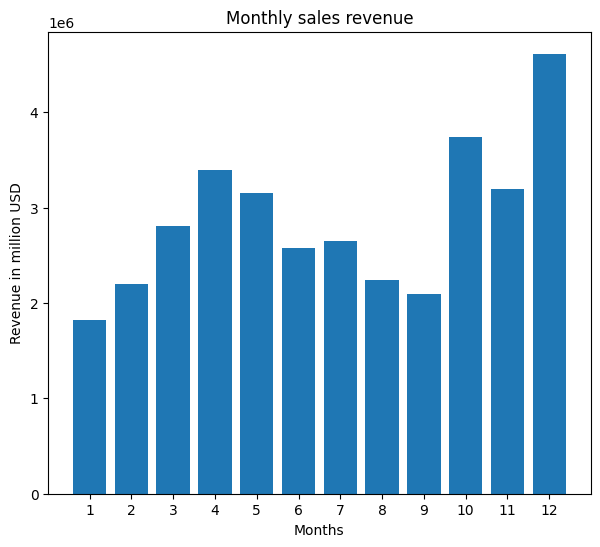

In [68]:
fig, ax = plt.subplots(figsize=(7,6))

x = tot_sales_per_month.index
y = tot_sales_per_month.values

ax.bar(x, y)

ax.set_xlabel('Months')
ax.set_ylabel('Revenue in million USD')
ax.set_xticks(range(1,13))
ax.set_title('Monthly sales revenue')

plt.show()

### Zadatak 2. Iz kog grada je naručeno najviše proizvoda?

Za potrebe ovog zadatka, grupisaćemo porudžbine prema gradu iz koga dolaze:

In [69]:
quantity_per_city = sales.groupby('Purchase_city')['Quantity_Ordered'].sum()
quantity_per_city

Purchase_city
Atlanta (GA)          16602.0
Austin (TX)           11153.0
Boston (MA)           22528.0
Dallas (TX)           16730.0
Los Angeles (CA)      33289.0
New York City (NY)    27932.0
Portland (ME)          2750.0
Portland (OR)         11303.0
San Francisco (CA)    50239.0
Seattle (WA)          16553.0
Name: Quantity_Ordered, dtype: float64

Sortiraćemo rezultate u opadajućem redosledu naručene količine:

In [70]:
quantity_per_city.sort_values(ascending=False, inplace=True)
quantity_per_city

Purchase_city
San Francisco (CA)    50239.0
Los Angeles (CA)      33289.0
New York City (NY)    27932.0
Boston (MA)           22528.0
Dallas (TX)           16730.0
Atlanta (GA)          16602.0
Seattle (WA)          16553.0
Portland (OR)         11303.0
Austin (TX)           11153.0
Portland (ME)          2750.0
Name: Quantity_Ordered, dtype: float64

Na kraju, prikazaćemo rezultate vizuelno primenom bar plota.

Napomena: za fina podešavanja prikaza plota, brojne korisne metode se mogu naći u [ovom delu](https://matplotlib.org/stable/api/axes_api.html) Matplotlib dokumentacije

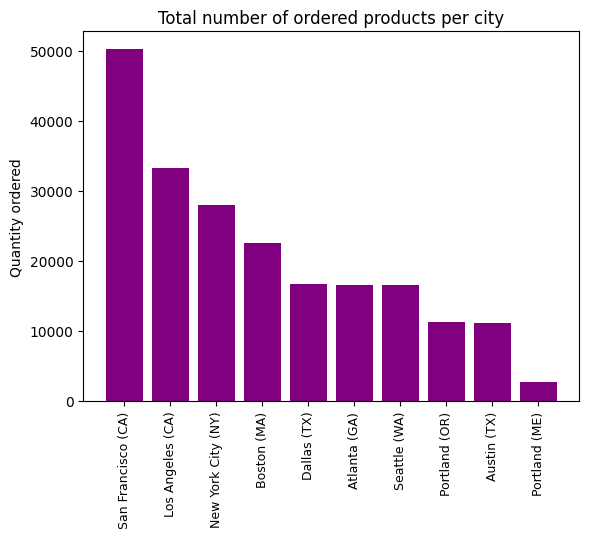

In [71]:
x = quantity_per_city.index
y = quantity_per_city.values

_, ax = plt.subplots()
ax.bar(x, y, color='purple')
ax.set_ylabel("Quantity ordered")
ax.set_title("Total number of ordered products per city")
ax.tick_params(axis='x', labelrotation=90, labelsize=9)

plt.show()

### Zadatak 3. Kada, tokom dana, klijenti imaju tendenciju da naprave najvrednije porudžbine?

Da bismo odgovorili na ovo pitanje, potrebno je da izdvojimo sate iz `Order_Date` kolone i utvrdimo prosečnu ukupnu cenu porudžbine za svaki sat u toku dana

**Korak 1**: Kreiranje 'Order_Hour' kolone

In [72]:
sales['Order_Hour'] = sales.Order_Date.dt.hour

In [73]:
sales[['Order_Date', 'Order_Hour']].sample(5)

,Order_Date,Order_Hour
175638,2019-06-09 23:51:00,23
54102,2019-02-10 11:01:00,11
136822,2019-10-18 14:55:00,14
152643,2019-09-25 17:50:00,17
57083,2019-03-02 13:48:00,13


**Korak 2**: Grupisanje narudžbina na osnovu `Order_Hour` i izračuvanje prosečne vrednosti `Total_Price` varijable za svaku grupu

In [74]:
mean_sales_per_hour = sales.groupby('Order_Hour')['Total_Price'].mean()
mean_sales_per_hour

Order_Hour
0     182.537409
1     196.113566
2     188.939212
3     175.400590
4     190.469567
5     174.625148
6     180.545125
7     185.702847
8     190.592866
9     187.360606
10    177.657782
11    185.368644
12    184.064617
13    177.705483
14    189.700722
15    190.815686
16    183.416921
17    195.372200
18    180.728689
19    186.977028
20    186.597664
21    186.979293
22    182.220495
23    187.936963
Name: Total_Price, dtype: float64

Sortirati rezultate u opadajućem redosledu prosečne ukupne vrednosti narudžbina

In [75]:
mean_sales_per_hour.sort_values(ascending=False)

Order_Hour
1     196.113566
17    195.372200
15    190.815686
8     190.592866
4     190.469567
14    189.700722
2     188.939212
23    187.936963
9     187.360606
21    186.979293
19    186.977028
20    186.597664
7     185.702847
11    185.368644
12    184.064617
16    183.416921
0     182.537409
22    182.220495
18    180.728689
6     180.545125
13    177.705483
10    177.657782
3     175.400590
5     174.625148
Name: Total_Price, dtype: float64

Prikaz rezultata u formi linijskog plota

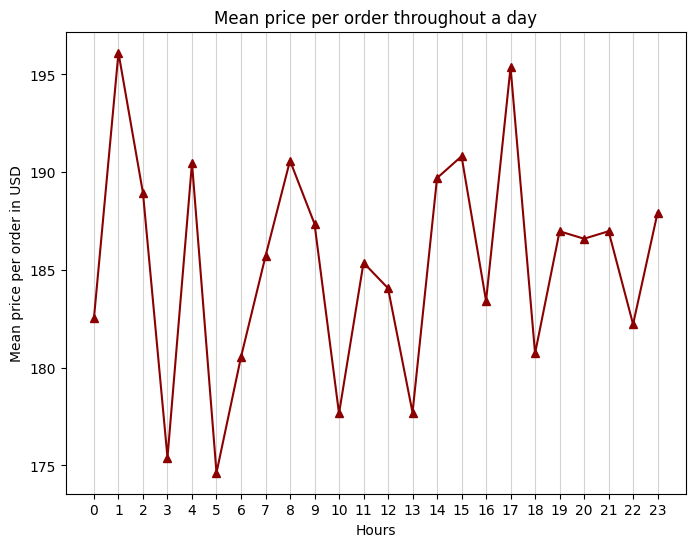

In [76]:
x = mean_sales_per_hour.index
y = mean_sales_per_hour.values

_, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, color='darkred', marker='^')
ax.set_xlabel("Hours")
ax.set_ylabel("Mean price per order in USD")
ax.set_title("Mean price per order throughout a day")
ax.set_xticks(range(24))
ax.grid(visible=True, axis='x', which='major', color='lightgrey')

plt.show()


### Zadatak 4. Koji proizvodi su se najviše prodavali tokom 2019. god? Koji proizvodi su najviše doprineli ukupnom prihodu?

Prvo ćemo utvrditi koliko različitih proizvoda postoji i koliko često su bili naručeni

In [77]:
sales.Product.nunique()

19

In [78]:
sales.Product.value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

Gornja pandas serija nam daje broj porudžbina u kojima se pojavio proizvod, ali ne govori nam o količinama koje su naručene.

Potrebno je da za svaki proizvod, uzmemo ukupnu naručenu količinu i ukupnu cenu za sve porudžbine koje se odnose na taj proizvod:

In [79]:
product_sales = sales.groupby('Product')[['Quantity_Ordered', 'Total_Price']].sum()
product_sales

,Quantity_Ordered,Total_Price
Product,,
20in Monitor,4129.0,454148.71
27in 4K Gaming Monitor,6244.0,2435097.56
27in FHD Monitor,7550.0,1132424.50
34in Ultrawide Monitor,6199.0,2355558.01
AA Batteries (4-pack),27635.0,106118.40
AAA Batteries (4-pack),31017.0,92740.83
Apple Airpods Headphones,15661.0,2349150.00
Bose SoundSport Headphones,13457.0,1345565.43
Flatscreen TV,4819.0,1445700.00


Odredićemo top 5 proizvoda po ostvarenom obimu prodaje:

In [80]:
product_sales.sort_values(by='Quantity_Ordered', ascending=False).head(5)

,Quantity_Ordered,Total_Price
Product,,
AAA Batteries (4-pack),31017.0,92740.83
AA Batteries (4-pack),27635.0,106118.40
USB-C Charging Cable,23975.0,286501.25
Lightning Charging Cable,23217.0,347094.15
Wired Headphones,20557.0,246478.43


Takođe, top 5 proizvoda po ostvarenom prihodu:

In [81]:
product_sales.sort_values(by='Total_Price', ascending=False).head(5)

,Quantity_Ordered,Total_Price
Product,,
Macbook Pro Laptop,4728.0,8037600.00
iPhone,6849.0,4794300.00
ThinkPad Laptop,4130.0,4129958.70
Google Phone,5532.0,3319200.00
27in 4K Gaming Monitor,6244.0,2435097.56


Predstavićemo ove rezultate i vizuelno. Konkretno, napravićemo dve horizontalna bar plota, jedan pored drugog, pri čemu će prvi prikazivati ukupan prihod po proizvodu, a drugi prodatu količinu proizvoda. Sortiraćemo plotove na osnovu ukupnog prihoda, tako da proizvodi sa najvećim prihodom budu prikazani pri vrhu plota.

Smernice za kreiranje horizontalnog bar plota možete naći, na primer, u [ovom primeru](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html) iz Mathplotlib dokumentacije.

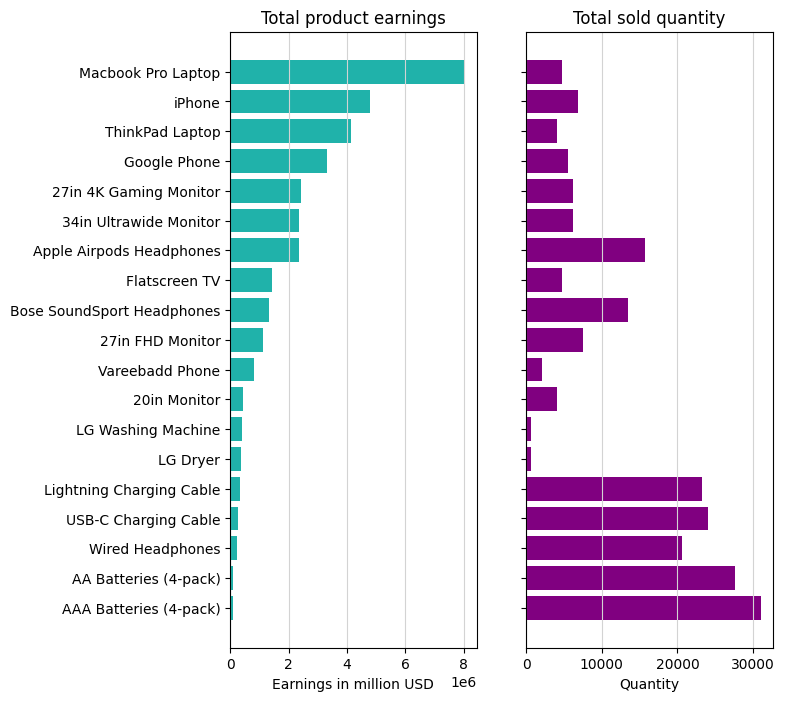

In [82]:
product_sales.sort_values(by="Total_Price", inplace=True)

x = product_sales.index
y1 = product_sales.Total_Price
y2 = product_sales.Quantity_Ordered

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,8))
ax1.barh(x, y1, color='lightseagreen')
ax1.set_title("Total product earnings")
ax1.set_xlabel("Earnings in million USD")
ax1.grid(axis='x', visible=True, which='major', color='lightgrey')

ax2.barh(x, y2, color='purple')
ax2.set_title("Total sold quantity")
ax2.set_xlabel("Quantity")

ax2.grid(axis='x', visible=True, which='major', color='lightgrey')

plt.show()

### Zadatak 5. Pregled ostvarenog prihoda od prodaje po proizvodima i gradovima

Podatke možemo grupisati na osnovu više od jednog atributa (kolone). U ovom slučaju, izvršićemo grupisanje na osnovu proizvoda i grada iz koga je porudžbina stigla, i izračunati ukupan prihod za svaki proizvod u svakom gradu:

In [83]:
sales_per_product_and_city = sales.groupby(['Product', 'Purchase_city'])['Total_Price'].sum()
sales_per_product_and_city

Product       Purchase_city     
20in Monitor  Atlanta (GA)            37616.58
              Austin (TX)             25297.70
              Boston (MA)             43336.06
              Dallas (TX)             37726.57
              Los Angeles (CA)        72373.42
                                       ...    
iPhone        New York City (NY)     616700.00
              Portland (ME)           55300.00
              Portland (OR)          259700.00
              San Francisco (CA)    1162700.00
              Seattle (WA)           382200.00
Name: Total_Price, Length: 190, dtype: float64

Primetite da smo kao rezultat dobili pandas seriju sa dva indeksa - `Product` i `Purchase_City`:

In [84]:
sales_per_product_and_city.info()

<class 'pandas.core.series.Series'>
MultiIndex: 190 entries, ('20in Monitor', 'Atlanta (GA)') to ('iPhone', 'Seattle (WA)')
Series name: Total_Price
Non-Null Count  Dtype  
--------------  -----  
190 non-null    float64
dtypes: float64(1)
memory usage: 2.7+ KB


In [85]:
sales_per_product_and_city.index

MultiIndex([('20in Monitor',       'Atlanta (GA)'),
            ('20in Monitor',        'Austin (TX)'),
            ('20in Monitor',        'Boston (MA)'),
            ('20in Monitor',        'Dallas (TX)'),
            ('20in Monitor',   'Los Angeles (CA)'),
            ('20in Monitor', 'New York City (NY)'),
            ('20in Monitor',      'Portland (ME)'),
            ('20in Monitor',      'Portland (OR)'),
            ('20in Monitor', 'San Francisco (CA)'),
            ('20in Monitor',       'Seattle (WA)'),
            ...
            (      'iPhone',       'Atlanta (GA)'),
            (      'iPhone',        'Austin (TX)'),
            (      'iPhone',        'Boston (MA)'),
            (      'iPhone',        'Dallas (TX)'),
            (      'iPhone',   'Los Angeles (CA)'),
            (      'iPhone', 'New York City (NY)'),
            (      'iPhone',      'Portland (ME)'),
            (      'iPhone',      'Portland (OR)'),
            (      'iPhone', 'San Francisco (CA)

Ovakvu seriju možemo transformisati u data frame uz pomoć `unstack()` metode:

In [86]:
product_city_sales_df = sales_per_product_and_city.unstack()

In [87]:
product_city_sales_df.head(10)

Purchase_city,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,37616.58,25297.70,43336.06,37726.57,72373.42,61594.40,6489.41,24087.81,109990.00,35636.76
27in 4K Gaming Monitor,192265.07,124016.82,263243.25,187585.19,391159.97,328371.58,33149.15,136106.51,569385.40,209814.62
27in FHD Monitor,88194.12,53996.40,119542.03,88044.13,183437.77,160789.28,17098.86,62395.84,272081.86,86844.21
34in Ultrawide Monitor,183155.18,124636.72,254973.29,194554.88,362890.45,329831.32,28879.24,124256.73,549465.54,202914.66
AA Batteries (4-pack),8421.12,5468.16,11581.44,8682.24,17041.92,13939.20,1493.76,5952.00,25171.20,8367.36
AAA Batteries (4-pack),7053.41,4987.32,10348.39,7486.96,14851.33,12330.76,1070.42,5148.78,22149.92,7313.54
Apple Airpods Headphones,189900.00,133050.00,247950.00,179100.00,370950.00,314700.00,34950.00,129900.00,559950.00,188700.00
Bose SoundSport Headphones,108389.16,70692.93,141585.84,106289.37,212478.75,179382.06,17998.20,70892.91,331666.83,106189.38
Flatscreen TV,122100.00,72600.00,166200.00,126000.00,218100.00,188400.00,18600.00,75000.00,346200.00,112500.00


In [88]:
product_city_sales_df.shape

(19, 10)

S obzirom da je ovakav prikaz ostvarene prodaje vrlo nepregledan, predstavićemo ga vizuelno, koristeći `heatmap`. 

Korisne smernice za kreiranje heatmap-e date su, na primer, [ovde](https://python-charts.com/correlation/heatmap-matplotlib/).

Na [ovoj stranici](https://matplotlib.org/stable/users/explain/colors/colormaps.html) Matplotlib dokumentacije možete naći pregled predefinisanih kolor mapa.

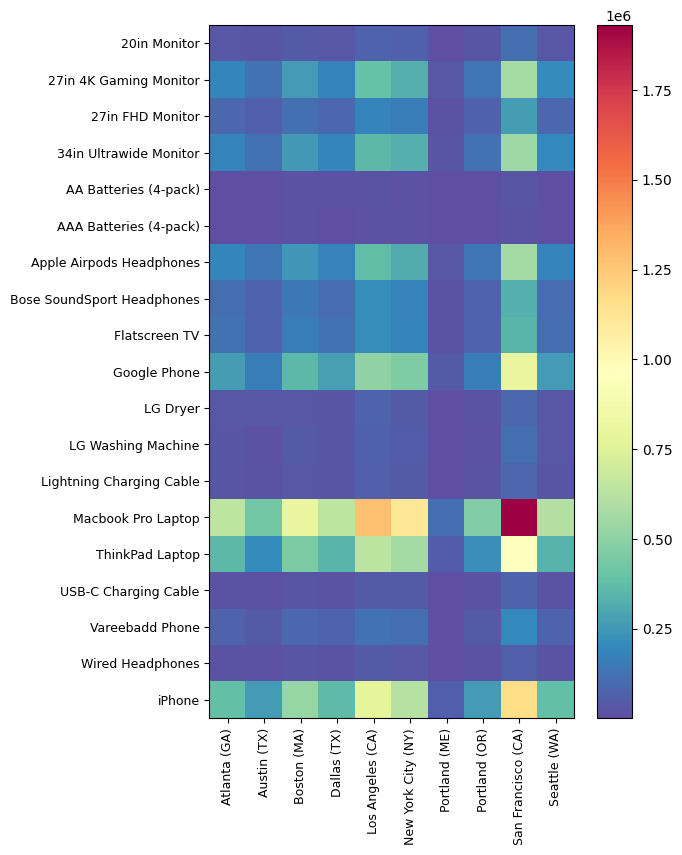

In [89]:
_, ax = plt.subplots(figsize=(6,9))
im = ax.imshow(product_city_sales_df, cmap='Spectral_r')

# Add the color bar
cbar = ax.figure.colorbar(im, ax = ax)

# Add the labels
x_ticks = product_city_sales_df.columns.tolist()
y_ticks = product_city_sales_df.index.tolist()

ax.set_xticks(range(len(x_ticks)), labels = x_ticks)
ax.tick_params(axis='x', labelrotation=90, labelsize=9)
ax.set_yticks(range(len(y_ticks)), labels = y_ticks)
ax.tick_params(axis='y', labelsize=9)

plt.show()

### Zadaci za vežbu

1. Uradite pregled ukupnog ostvarenog prihoda po proizvodima i državama.

2. Kojih dana, tokom nedelje, je prosečna vrednost porudžbina bila najviša?
